In [7]:
import pandas as pd
from scipy.stats import mode
low_memory=False

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [8]:
df = pd.read_csv(r'df2009_df2018.csv', delimiter=',')

In [9]:
df.head()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,29,2009,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS
1,21,2009,Masculino,Desvinculado do curso,ANALISE E DESENVOLVIMENTO DE SISTEMAS
2,20,2009,Masculino,Cursando,COMPUTACAO
3,41,2009,Masculino,Matrícula trancada,ANALISE E DESENVOLVIMENTO DE SISTEMAS
4,18,2009,Masculino,Cursando,INFORMATICA


In [10]:
df.shape

(1217117, 5)

In [11]:
df.dtypes

IDADE        int64
ANO          int64
SEXO        object
SITUACAO    object
CURSO       object
dtype: object

In [12]:
df['IDADE'].describe()

count    1.217117e+06
mean     2.707266e+01
std      7.438209e+00
min      1.300000e+01
25%      2.100000e+01
50%      2.500000e+01
75%      3.100000e+01
max      8.400000e+01
Name: IDADE, dtype: float64

In [43]:
df.groupby('SEXO')['IDADE'].median()

SEXO
Feminino     25
Masculino    25
Name: IDADE, dtype: int64

In [14]:
df.groupby('SEXO')['IDADE'].mean()

SEXO
Feminino     26.613892
Masculino    27.164551
Name: IDADE, dtype: float64

In [15]:
masc = df[df['SEXO'] == 'Masculino'] 
femi = df[df['SEXO'] == 'Feminino']

In [16]:
masc.mode()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,21,2018,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS


In [17]:
femi.mode()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,20,2018,Feminino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS


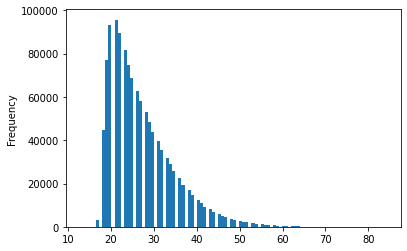

In [18]:
df['IDADE'].plot(kind = 'hist', bins = 100)

In [19]:
#Assemetria (skewness - positive skew) - distribuição tem uma cauda e média está à direita.
df.IDADE.skew()

1.2870010570455597

In [20]:
#Curtose-leptocurtica, possui a curva da função de distribuição mais afunilada com um pico mais alto do que a distribuição normal
df.IDADE.kurtosis()

1.9136320583452933

In [21]:
df['CURSO'].unique()

array(['ANALISE E DESENVOLVIMENTO DE SISTEMAS', 'COMPUTACAO',
       'INFORMATICA', 'TECNOLOGIA DA INFORMACAO'], dtype=object)

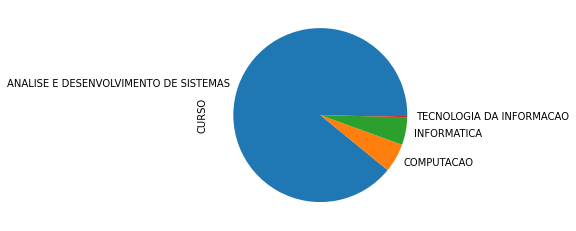

In [22]:
df['CURSO'].value_counts().plot.pie()

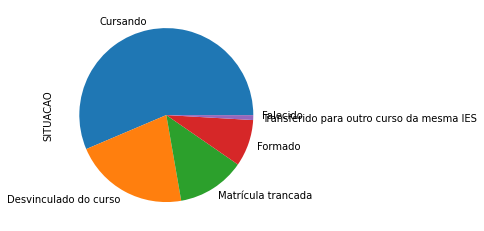

In [23]:
df["SITUACAO"].value_counts().plot.pie()

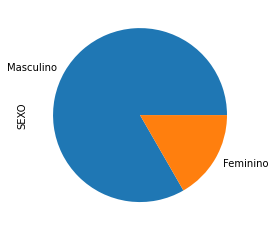

In [24]:
df["SEXO"].value_counts().plot.pie()

In [25]:
df['idade_categoria'] = pd.cut(
    df['IDADE'],
    bins = ( 13, 20, 30, 40, 50, 60, 70, 80, 84),
    labels = ('13 a 20', '20 a 30', '30 a 40', '40 a 50', '50 a 60', '60 a 70', '70 a 80', '80 a 84'))

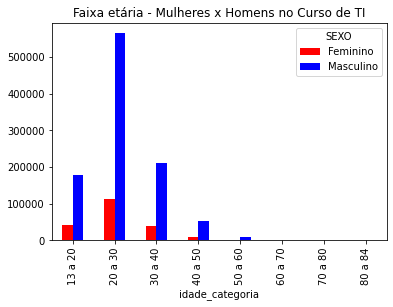

In [26]:
situacao_sexo_id = pd.crosstab(df['idade_categoria'],df['SEXO'])
situacao_sexo_id.plot(kind='bar',width=0.5, color=['red','blue'], title='Faixa etária - Mulheres x Homens no Curso de TI')

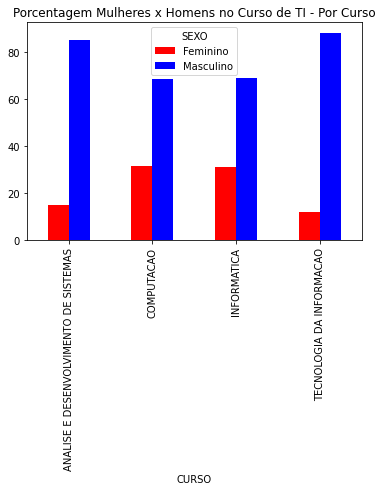

In [27]:
curso_sexo = pd.crosstab(df['CURSO'],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
curso_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Porcentagem Mulheres x Homens no Curso de TI - Por Curso')

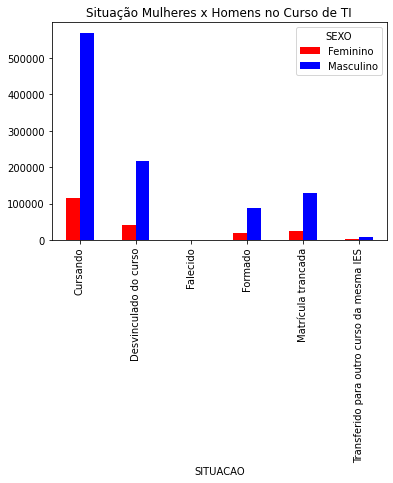

In [28]:
situacao_sexo = pd.crosstab(df['SITUACAO'],df['SEXO'])
situacao_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Situação Mulheres x Homens no Curso de TI')

In [29]:
curso_ano = pd.crosstab(df['ANO'],df['SEXO'])
curso_ano

SEXO,Feminino,Masculino
ANO,,
2009,10164,40309
2010,13887,58140
2011,16777,73014
2012,19052,86917
2013,20876,98899
2014,23483,115072
2015,23559,121969
2016,23639,129352
2017,24430,136797


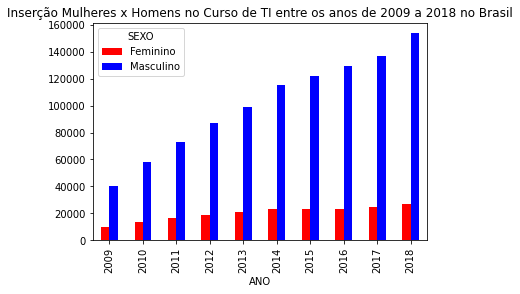

In [30]:
curso_ano.plot(kind='bar',width=0.5, color=['red','blue'], 
               title='Inserção Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil' ,grid=False)

In [31]:
curso_ano_per = pd.crosstab(df['ANO'],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
curso_ano_per

SEXO,Feminino,Masculino
ANO,,
2009,20.137499,79.862501
2010,19.280270,80.719730
2011,18.684501,81.315499
2012,17.978843,82.021157
2013,17.429347,82.570653
2014,16.948504,83.051496
2015,16.188637,83.811363
2016,15.451236,84.548764
2017,15.152549,84.847451


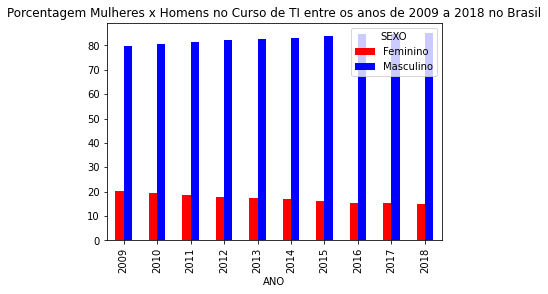

In [32]:
curso_ano_per.plot(kind='bar',width=0.5, color=['red','blue'],
                   title='Porcentagem Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil', grid=False)

In [33]:
#Quantos alunos acima de 31 anos estudam?

df['alunos_idade'] = ['> 31' if x > 31 else '< 31' for x in df['IDADE']]

In [34]:
df['alunos_idade'].value_counts() 

< 31    934757
> 31    282360
Name: alunos_idade, dtype: int64

In [35]:
df['idade_categoria'].value_counts().reset_index().sort_values('index', ascending=True)

,index,idade_categoria
2,13 a 20,218388
0,20 a 30,676708
1,30 a 40,247817
3,40 a 50,60707
4,50 a 60,12108
5,60 a 70,1289
6,70 a 80,93
7,80 a 84,5


In [36]:
x = pd.DataFrame(df.query('SITUACAO == "Formado" and SEXO =="Masculino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))
y = pd.DataFrame(df.query('SITUACAO == "Formado" and SEXO =="Feminino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))

z = pd.DataFrame(df.query('SITUACAO == "Cursando" and SEXO =="Masculino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))
w = pd.DataFrame(df.query('SITUACAO == "Cursando" and SEXO =="Feminino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))

In [37]:
data = pd.concat([x, y, z, w])

In [38]:
sit_sex = pd.crosstab(data['SITUACAO'],data['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
sit_sex

SEXO,Feminino,Masculino
SITUACAO,,
Cursando,14.837883,85.162117
Formado,15.913133,84.086867


<Figure size 864x432 with 0 Axes>

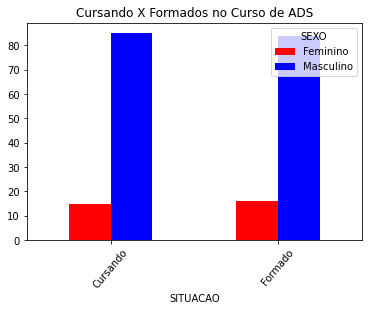

In [39]:
plt.figure(figsize= (12, 6))
sit_sex.plot(kind='bar',width=0.5, color=['red','blue'], title='Cursando X Formados no Curso de ADS')
plt.xticks(rotation = 50)
plt.show()

In [40]:
sit_ano = pd.crosstab(data['ANO'],data['SITUACAO']).apply(lambda r: r/r.sum(), axis=1) * 100
sit_ano

SITUACAO,Cursando,Formado
ANO,,
2009,90.411962,9.588038
2010,87.475000,12.525000
2011,87.001977,12.998023
2012,87.829746,12.170254
2013,87.414197,12.585803
2014,86.000541,13.999459
2015,84.413776,15.586224
2016,83.934510,16.065490
2017,85.161905,14.838095


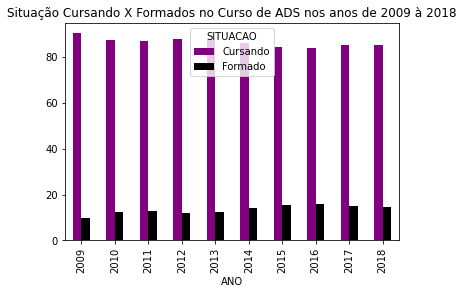

In [41]:
sit_ano.plot(kind='bar',width=0.5, color=['purple','black'], 
             title='Situação Cursando X Formados no Curso de ADS nos anos de 2009 à 2018')